<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/LS_DS_Unit_4_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

In [0]:
!pip install talos

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Nadam
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from keras.losses import binary_crossentropy
from keras.activations import relu, elu
import talos as ta
from talos import live

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** Neurons receive inputs and then pass on their signal if a threshold is passed.
- **Input Layer:** This layer receives direct input from out dataset. Also known as the visible layer because it is the only interactable part of the neural network.
- **Hidden Layer:** These are the layers after the input layers. They are called hidden because we cannot interact with them and see what they are doing, giving the neural network a connotation of a black box model. 
- **Output Layer:** The final layer of a neural network is the output layer. It produces results that are interpretable and useful for the given problem.
- **Activation:** The activation functions defines whether a given neuron should be activated based on the weighted sum. There are many different activation functions such as sigmoid, step function, linear function, relu, elu, etc.
- **Backpropagation:** Backpropagation is an optimazation algorithm that changes all the weights of the neurons based on the gradient of the loss function.


## 2. Perceptron on AND Gates <a id="Q3=2"></a>

Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2|x3|	y|
|---|---|---|---|
1|	1|	1|	1|
1|	0|	1|	0|
0|	1|	1|	0|
0|	0|	1|	0|

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [0]:
X = np.array([[1,1,1],
            [1,0,1],
            [0,1,1],
            [0,0,1]])
y = [[1],[0],[0],[0]]

In [20]:
weights = 2 * np.random.random((3,1)) - 1

for iteration in range(10000):
  #weighted sum of inputs/weights
  weighted_sum = np.dot(X,weights)
  
  #activate!
  activated_output = sigmoid(weighted_sum)
  #calculate error
  error = y - activated_output
  #adjustments
  adjustments = error * sigmoid_derivative(activated_output)
  
  weights+= np.dot(X.T, adjustments)
  


print('output after training')
print(activated_output)

output after training
[[9.96429848e-01]
 [2.00883583e-03]
 [2.00883583e-03]
 [1.45169524e-08]]


## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
y=data['target'].values.reshape(-1,1)
X=data.drop(columns='target').values

print('inputs:',X.shape)
print('labels:',y.shape)

inputs: (303, 13)
labels: (303, 1)


In [0]:
class NeuralNetwork:
  def __init__(self):
    
    self.inputs = 13
    self.L1hiddenNodes = 4
    self.L2hiddenNodes = 4
    self.outputNodes = 1
    
    self.L1_weights= np.random.randn(self.inputs,self.L1hiddenNodes)
    self.L2_weights= np.random.randn(self.L1hiddenNodes, self.L2hiddenNodes)
    self.output_weights= np.random.randn(self.L2hiddenNodes, self.outputNodes)
  
  def sigmoid(self, s):
    return 1/ (1+np.exp(-s))
  
  def sigmoidPrime(self, s):
    return s * (1 - s)
  
  def feed_forward(self,X):
    '''
    Calculate the NN inference using feed forward.
    '''
    
    self.L1_activated = self.sigmoid(np.dot(X, self.L1_weights))
    self.L2_activated = self.sigmoid(np.dot(self.L1_activated, self.L2_weights))
    
    self.activated_output = self.sigmoid(np.dot(self.L2_activated, 
                                                self.output_weights))
    
    return self.activated_output
  
  def back_prop(self, X, y , output):
    '''
    Backward propagate through the network
    '''
    
    self.output_error = y - output
    self.output_delta = self.output_error * self.sigmoidPrime(output)
    
    self.L2_error = self.output_delta.dot(self.output_weights.T)
    self.L2_delta = self.L2_error * self.sigmoidPrime(self.L2_activated)
    
    self.L1_error = self.L2_delta.dot(self.L2_weights.T)
    self.L1_delta = self.L1_error * self.sigmoidPrime(self.L1_activated)
    
    self.L1_weights += X.T.dot(self.L1_delta)
    self.L2_weights += self.L1_activated.T.dot(self.L2_delta)
    self.output_weights += self.L2_activated.T.dot(self.output_delta)
    
  def train(self, X, y):
    output = self.feed_forward(X)
    self.back_prop(X, y, output)

In [33]:
model = NeuralNetwork()
epochs=1000

for i in range (epochs):
  if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
    print('epoch' ,i+1)
    print('Loss: \n' + str(np.mean(np.square(y-model.feed_forward(X)))))
  model.train(X,y)

epoch 1
Loss: 
0.3002162313332033
epoch 2
Loss: 
0.2497805597582963
epoch 3
Loss: 
0.24970687674284373
epoch 4
Loss: 
0.24960647397856564
epoch 5
Loss: 
0.2494628596314568
epoch 50
Loss: 
0.24801490049995104
epoch 100
Loss: 
0.24801490049995098
epoch 150
Loss: 
0.24801490049995106
epoch 200
Loss: 
0.24801490049995106
epoch 250
Loss: 
0.24801490049995098
epoch 300
Loss: 
0.24801490049995098
epoch 350
Loss: 
0.24801490049995098
epoch 400
Loss: 
0.24801490049995104
epoch 450
Loss: 
0.24801490049995104
epoch 500
Loss: 
0.24801490049995098
epoch 550
Loss: 
0.24801490049995104
epoch 600
Loss: 
0.24801490049995104
epoch 650
Loss: 
0.24801490049995104
epoch 700
Loss: 
0.24801490049995106
epoch 750
Loss: 
0.24801490049995104
epoch 800
Loss: 
0.24801490049995106
epoch 850
Loss: 
0.24801490049995106
epoch 900
Loss: 
0.24801490049995106
epoch 950
Loss: 
0.24801490049995106
epoch 1000
Loss: 
0.24801490049995098


## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

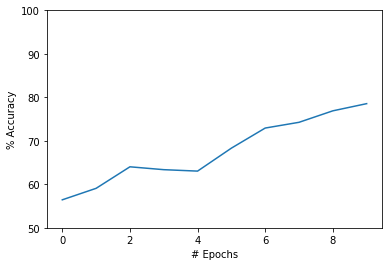

Baseline Cross Validation Score: 0.5214521471816714 used {'batch_size': 10, 'epochs': 10}



In [38]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=13, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model,verbose=0)

batch_size=[10]
epochs=[10]
param_grid={
    'batch_size':batch_size,
    'epochs':epochs
}

c_v= StratifiedKFold(n_splits=5,
                     shuffle=True)

cv_grid = GridSearchCV(estimator=model, param_grid=param_grid,
                       n_jobs=1,
                       cv=c_v)

xval = cv_grid.fit(X,y)

acc=[x*100 for x in xval.best_estimator_.model.history.history['acc']]
fig, ax = plt.subplots()
ax.plot(acc)
ax.set_ylabel('% Accuracy')
ax.set_xlabel('# Epochs')
ax.set_ylim(50,100)
plt.show()

print(f'Baseline Cross Validation Score: {xval.best_score_} used {xval.best_params_}\n')

In [43]:
param_grid={
    'batch_size':[10,20,30,40,50],
    'epochs':[20]
}

cv_grid = GridSearchCV(estimator=model, param_grid=param_grid,
                       n_jobs=1)

grid_result = cv_grid.fit(X,y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.5973597359244186 using {'batch_size': 10, 'epochs': 20}
Means: 0.5973597359244186, Stdev: 0.37400180906805003 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5577557810855778, Stdev: 0.41633895705816076 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5445544561340471, Stdev: 0.4130821538017203 with: {'batch_size': 30, 'epochs': 20}
Means: 0.363036310712103, Stdev: 0.26681694094320957 with: {'batch_size': 40, 'epochs': 20}
Means: 0.38613862128737736, Stdev: 0.20403408469656906 with: {'batch_size': 50, 'epochs': 20}


In [44]:
param_grid={
    'batch_size':[10],
    'epochs':[20,40,60]
}

cv_grid = GridSearchCV(estimator=model, param_grid=param_grid,
                       n_jobs=1)

grid_result = cv_grid.fit(X,y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.6468646876489369 using {'batch_size': 10, 'epochs': 20}
Means: 0.6468646876489369, Stdev: 0.2830982999848007 with: {'batch_size': 10, 'epochs': 20}
Means: 0.4554455453413154, Stdev: 0.41308215348345934 with: {'batch_size': 10, 'epochs': 40}
Means: 0.3267326746443317, Stdev: 0.252167677295782 with: {'batch_size': 10, 'epochs': 60}


In [0]:
def create_model(x_train,y_train,x_val,y_val,params):
  model = Sequential()
  model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],activation=params['activation']))
  model.add(Dropout(params['dropout']))
  model.add(Dense(params['second_neuron'], activation=params['last_activation']))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=params['losses'],metrics=['accuracy'])
  
  history = model.fit(x_train,y_train,
                     validation_data=[x_val,y_val],
                     batch_size=params['batch_size'],
                     callbacks=[live()],
                     epochs=params['epochs'],
                     verbose=1)
  
  return history,model


In [0]:
p={
    'batch_size':[10,20,40],
    'epochs':[20,40],
    'first_neuron':[5,10],
    'second_neuron':[5,10],
    'activation':[relu,elu],
    'last_activation':[relu,elu],
    'dropout':[0,0.5],
    #'optimizer':[Adam],
    'losses':[binary_crossentropy]    
}

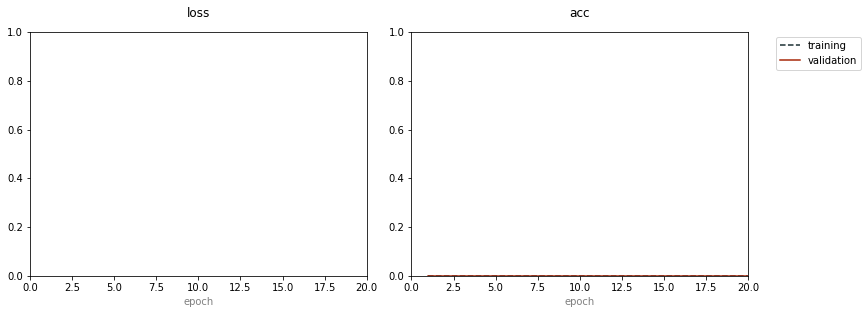



100%|██████████| 192/192 [45:04<00:00, 13.23s/it]



In [11]:
t = ta.Scan(x=X,
            y=y,
            model=create_model,
            params=p,
            dataset_name='indians',
            experiment_no='1')

In [12]:
t.data.head()

,round_epochs,val_loss,val_acc,loss,acc,batch_size,epochs,first_neuron,second_neuron,activation,last_activation,dropout,losses
0,40,8.856096,0.000000,6.434966,0.051887,10,40,10,10,<function relu at 0x7f8fcc6d3950>,<function relu at 0x7f8fcc6d3950>,0.5,<function binary_crossentropy at 0x7f8fcc71fa60>
1,20,8.856096,0.000000,6.851928,0.042453,10,20,10,5,<function elu at 0x7f8fcc6d3730>,<function relu at 0x7f8fcc6d3950>,0.5,<function binary_crossentropy at 0x7f8fcc71fa60>
2,20,8.856096,0.000000,8.743306,0.000000,40,20,5,10,<function elu at 0x7f8fcc6d3730>,<function relu at 0x7f8fcc6d3950>,0.0,<function binary_crossentropy at 0x7f8fcc71fa60>
3,40,6.900900,0.087912,7.157742,0.099057,40,40,5,5,<function relu at 0x7f8fcc6d3950>,<function elu at 0x7f8fcc6d3730>,0.0,<function binary_crossentropy at 0x7f8fcc71fa60>
4,20,7.182833,0.000000,7.294393,0.000000,40,20,5,5,<function elu at 0x7f8fcc6d3730>,<function relu at 0x7f8fcc6d3950>,0.0,<function binary_crossentropy at 0x7f8fcc71fa60>


In [0]:
r = ta.Reporting(t)

In [14]:
r.best_params()

array([[5, '<function relu at 0x7f8fcc6d3950>', 40,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 10,
        '<function relu at 0x7f8fcc6d3950>', 0.0, 20, 0],
       [5, '<function elu at 0x7f8fcc6d3730>', 40,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 10,
        '<function relu at 0x7f8fcc6d3950>', 0.0, 20, 1],
       [5, '<function relu at 0x7f8fcc6d3950>', 20,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 10,
        '<function elu at 0x7f8fcc6d3730>', 0.0, 20, 2],
       [5, '<function elu at 0x7f8fcc6d3730>', 40,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 5,
        '<function relu at 0x7f8fcc6d3950>', 0.0, 10, 3],
       [5, '<function elu at 0x7f8fcc6d3730>', 20,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 5,
        '<function relu at 0x7f8fcc6d3950>', 0.5, 20, 4],
       [5, '<function relu at 0x7f8fcc6d3950>', 40,
        '<function binary_crossentropy at 0x7f8fcc71fa60>', 5,
        '<function el

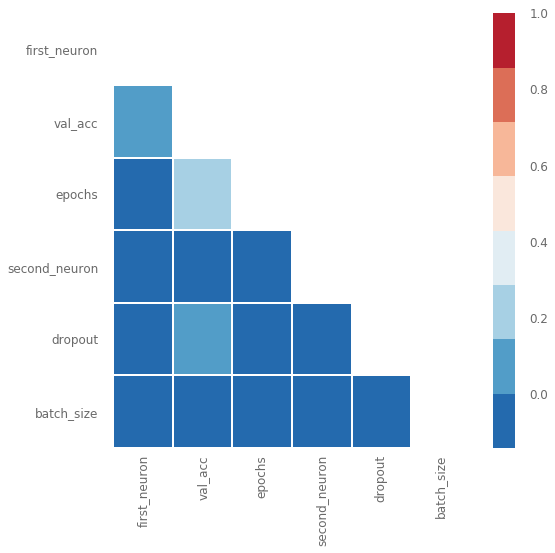

In [15]:
r.plot_corr()